## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Obtain Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrub Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df['waterfront'].unique()

array([nan,  0.,  1.])

### Fill Null Values

In [6]:
df['waterfront'].value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [7]:
#Over 99% of homes do not have waterfront, so fill null values with zeros
df['waterfront'] = df['waterfront'].fillna(value = 0)

In [8]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [9]:
#Over 96% of houses do not have renovations, it's safe to assume null values 
# here indicate the home hasn't been renovated. Fill with zeros
df['yr_renovated'] = df['yr_renovated'].fillna(value = 0)

In [10]:
df['view'].value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

In [11]:
# The majority of views (90%) have a zero value, so it's safe to add zeros to
# null values. Most likely will not be using this data anyway.
df['view'] = df['view'].fillna(value = 0)

In [12]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Convert Data Types

In [13]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
df['year'] = df['date'].dt.year

In [15]:
df['year'].unique()

array([2014, 2015], dtype=int64)

In [16]:
#This dataset only contains houses that were sold in 2014 and 2015. So, the year
#sold will not be a good predictor of home price for modeling purposes. Drop column
df.drop(['year'], axis=1, inplace=True)

In [17]:
df['month'] = df['date'].dt.month

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
dtypes: datetime64[ns](1), fl

In [19]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [20]:
#One basement value shows up as '?'. The majority of houses in the area do not have
#basements. Replace this value with zero, then convert datatype to float

df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value=0)

In [21]:
df['sqft_basement'] = df.sqft_basement.astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
dtypes: datetime64[ns](1), f

### Drop Duplicates

In [23]:
#Drop any duplicated homes on 'id' to avoid multiple inputs and potential future
#conflict in the modeling process
df.drop_duplicates(subset='id', inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
month            21420 non-null int64
dtypes: datetime64[ns](1), f

### Check for Extranous Values

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,...,1791.170215,285.904342,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,6.590336
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,...,828.692965,440.008202,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,3.107924
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,...,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


In [26]:
#check for extraneous values
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 2014-06-23    0.006629
2014-06-26    0.006116
2014-06-25    0.006116
2014-07-08    0.005929
2015-04-27    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.

In [27]:
# A home was detected with 33 bedrooms. This seems to be a typo based on the other
#provided information on the house. Change this outlier to 3 bedrooms
df['bedrooms'] = df['bedrooms'].replace(to_replace=33, value=3)

In [28]:
#Drop columns that won't be used during analysis
df.drop(['view'], axis=1, inplace=True)

In [29]:
df.drop(['sqft_living15'], axis=1, inplace=True)

In [30]:
df.drop(['sqft_lot15'], axis=1, inplace=True)

In [31]:
cleaned_df = df.copy(deep=True)
cleaned_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2


## Explore Data

### Deal with Continuous Data

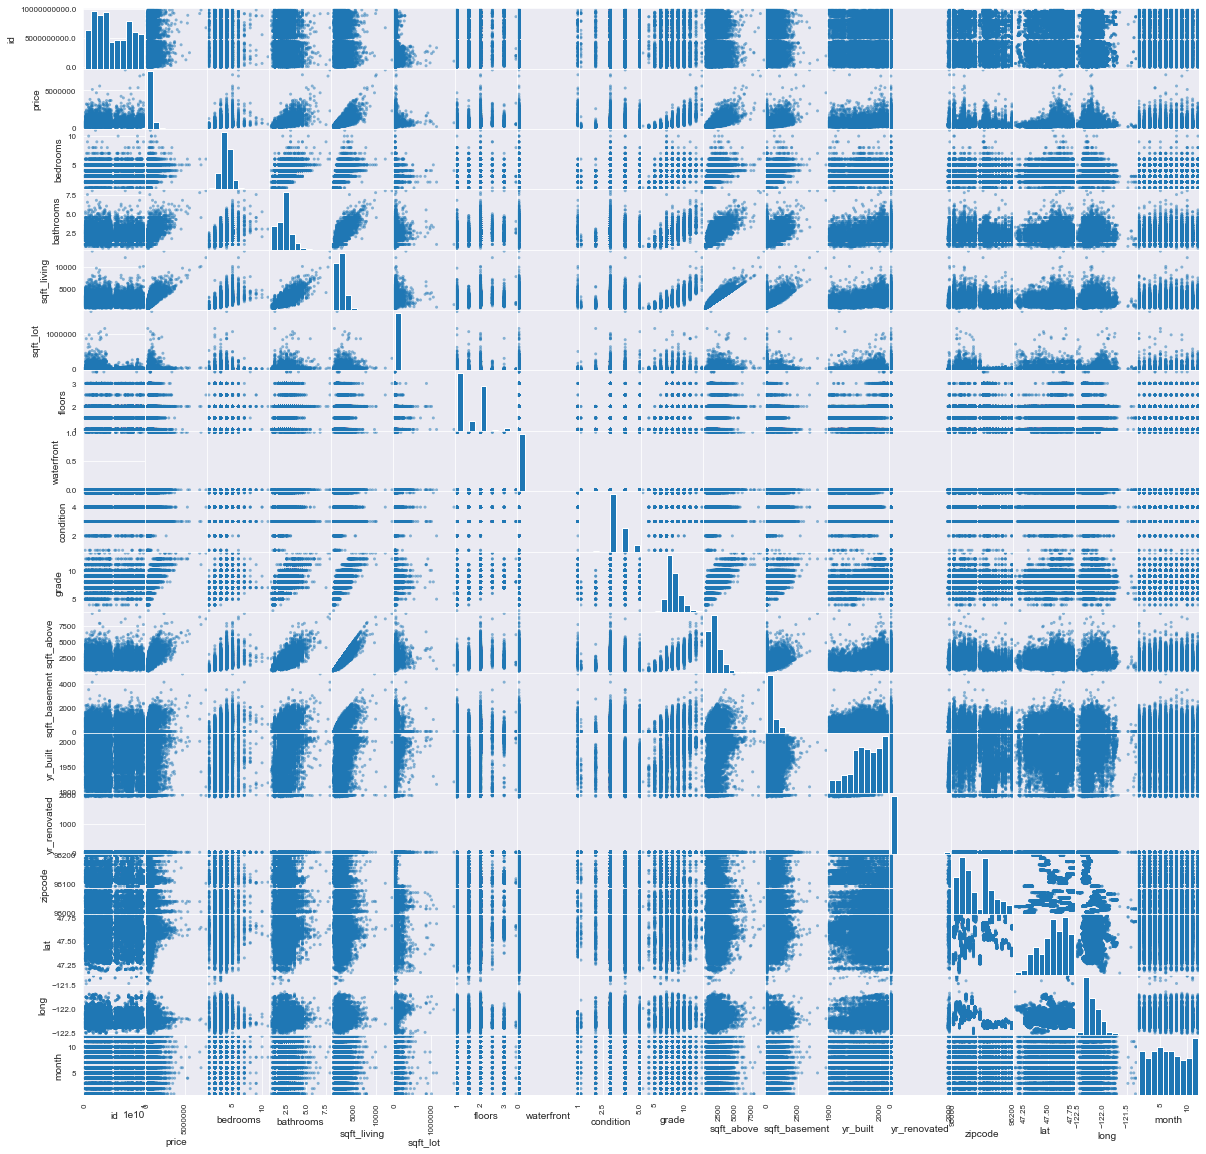

In [32]:
pd.plotting.scatter_matrix(cleaned_df, figsize = [20, 20])
plt.show()

In [33]:
# Taking a look at the scatter plots of the data, here are the potential categorical variables:
#  bedrooms, bathrooms, floors, waterfront, condition, grade, month.
# I'll also pull out sqft basement and year renovated to become categorical data


In [34]:
continuous_df = cleaned_df.copy(deep=True)
continuous_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2


In [35]:
#drop potential categorical data and unwanted columns
continuous_df.drop(['id', 'date', 'waterfront', 'grade', 'month', 'bathrooms',  
                   'condition', 'sqft_basement', 'yr_renovated', 'bedrooms',
                   'floors'], inplace=True, axis=1)
continuous_df.head()

,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
0,221900.0,1180,5650,1180,1955,98178,47.5112,-122.257
1,538000.0,2570,7242,2170,1951,98125,47.7210,-122.319
2,180000.0,770,10000,770,1933,98028,47.7379,-122.233
3,604000.0,1960,5000,1050,1965,98136,47.5208,-122.393
4,510000.0,1680,8080,1680,1987,98074,47.6168,-122.045


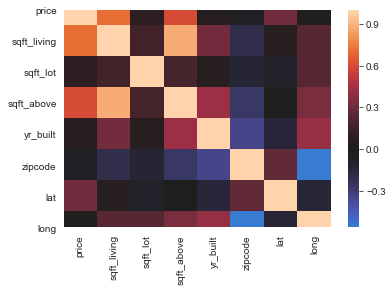

In [36]:
sns.heatmap(continuous_df.corr(), center = 0)

In [37]:
abs(continuous_df.corr()) >0.75

#sqft living at bathrooms have a high correlation
#sqft living and sqft above have high correlation

#After looking at the correlations, it's best to pull out bathrooms into categorical data
# and drop sqft above all together.

,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
price,True,False,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False
yr_built,False,False,False,False,True,False,False,False
zipcode,False,False,False,False,False,True,False,False
lat,False,False,False,False,False,False,True,False
long,False,False,False,False,False,False,False,True


In [38]:
cleaned_df.drop(['sqft_above'], axis=1, inplace=True)

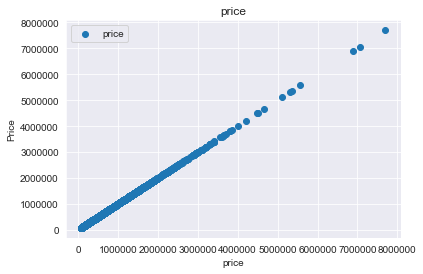

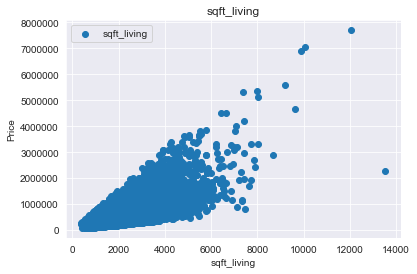

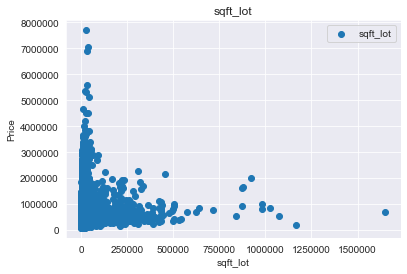

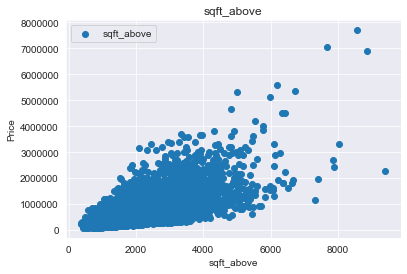

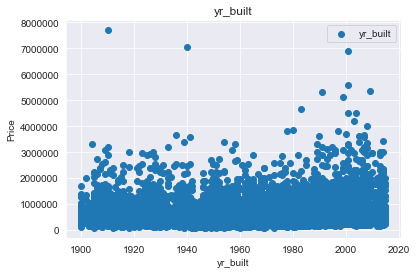

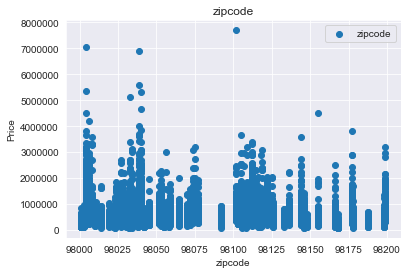

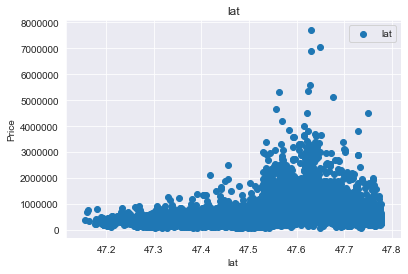

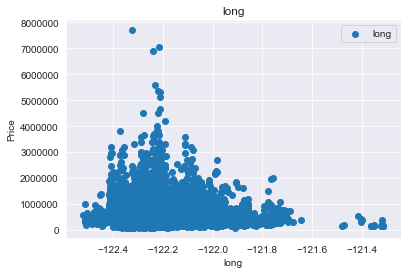

In [39]:
for col in continuous_df:
    plt.scatter(continuous_df[col], continuous_df['price'], label=col)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.legend()
    plt.show()

In [40]:
#A quick look at the scatter plots of these data show that there could be a correlation
# between number of bathrooms, sqaure foot of the house, and location (lat and long).
# Lot size, bedrooms, floors, and year built don't seem to have much of an influence 
# on price through the first look

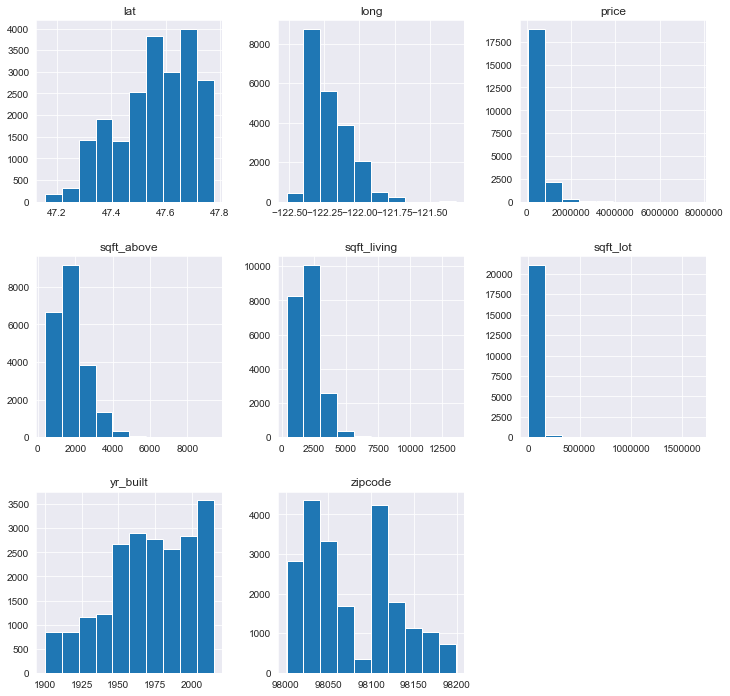

In [41]:
continuous_df.hist(figsize = (12,12))
plt.show()

#### Squarefoot Living

In [42]:
#Import necessary libraries to check regression assumptions
import statsmodels.api as sm
from statsmodels.formula.api import ols

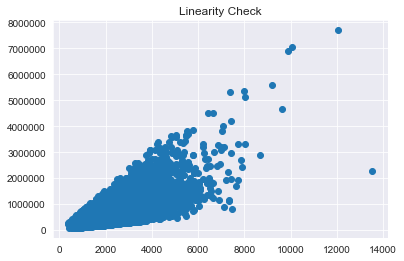

In [43]:
plt.scatter(continuous_df.sqft_living, continuous_df.price)
plt.title('Linearity Check')
plt.show()

In [44]:
f = 'price~sqft_living'
model = ols(formula=f, data=continuous_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Tue, 17 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:29:11   Log-Likelihood:            -2.9764e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.475e+04   4437.427    -10.084      0.000   -5.34e+04   -3.61e+04
sqft_living   281.0616      1.949    144.207      0.000     277.241     284.882
==============================================================================
Omnibus:                    14687.843   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538458.356
Skew:                           2.822   Prob(JB):                         0.00
Kurtosis:                      26.905   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#The p-value shows a significance between price and sqft of a home. But, as we 
#see from the initial r-squared value, only 49% of the price values can be explained by
# the squarefoot of a home. There is still room for improvement between these variables.

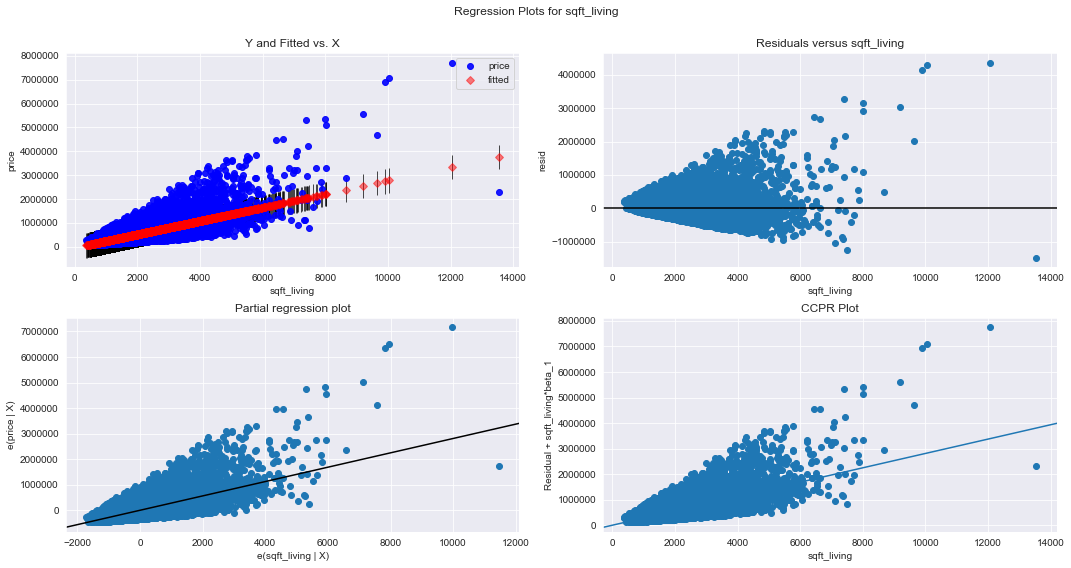

In [46]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.show()

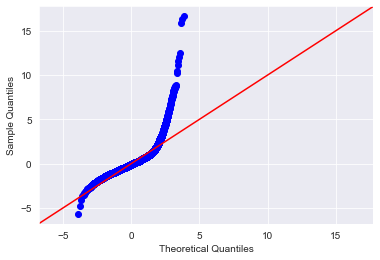

In [47]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

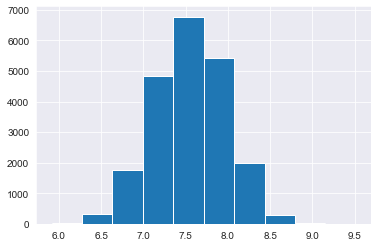

In [48]:
log_sqft_living = np.log(continuous_df['sqft_living'])
log_sqft_living.hist()

Real Estate Data on:price
-------------------------


AttributeError: 'int' object has no attribute 'boxplot'

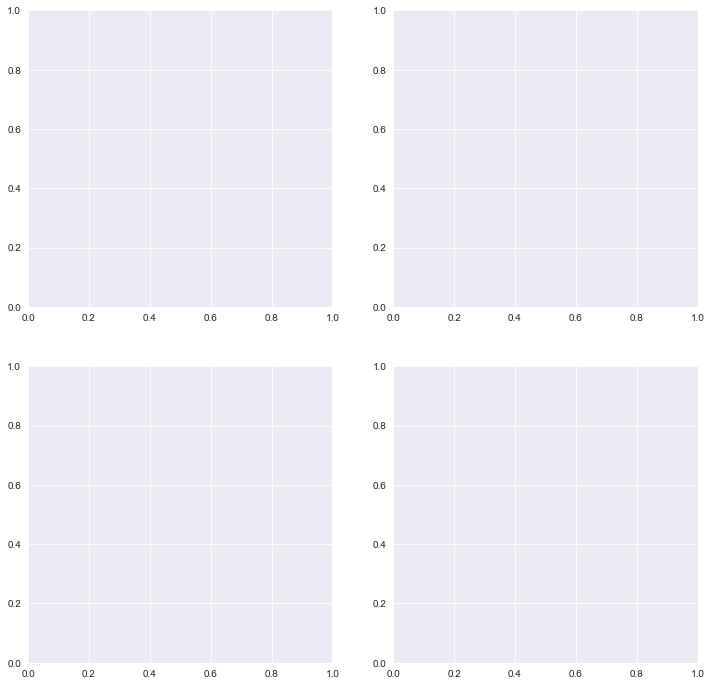

In [49]:
#Analyze data vs dependent variable

def seaborn_plotter(ind, dep, df):
    for i in ind:
        print('Real Estate Data on:' + i)
        print('-------------------------')
        
        #create subplots
        plt.figure(figsize=(12, 12))
        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 2, 3)
        ax4 = plt.subplot(2, 2, 4)
        
        #boxplot
        a = sns.boxplot(x=i, y=dep, data=df, ax=3)
        a.set_xlabel(i)
        a.set_ylabel('Price')
        a.axes.set_title('Boxplot', fontsize=20)
        a.ticks_params(labelsize=10)
        
        #countplot
        b = sns.countplot(df[i], ax=4)
        b.set_xlabel(i)
        b.set_ylabel('Count')
        b.axes.set_title('Variable Count', fontsize=20)
        b.ticks_params(labelsize=10)   
        
        #scatter
        c = sns.scatterplot(x=i, y=dep, data=df, ax=1)
        c.set_xlabel(i)
        c.set_ylabel('Price')
        c.axes.set_title('Scatter', fontsize=20)
        c.ticks_params(labelsize=10)        
        
        #distplot
        d = sns.distplot(df[i], ax=2)
        d.set_xlabel(i)
        d.set_ylabel('KDE')
        d.axes.set_title('Hist', fontsize=20)
        d.ticks_params(labelsize=10)    
        
        
seaborn_plotter(continuous_df, cleaned_df['price'], cleaned_df)

### Deal With Categorical Variables

In [50]:
cat_df = cleaned_df.copy(deep=True)

In [51]:
cat_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,2


In [52]:
cat_df.drop(['id', 'date', 'sqft_living', 'sqft_lot', 'yr_built',
           'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [53]:
cat_df.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_renovated,month
0,221900.0,3,1.00,1.0,0.0,3,7,0.0,0.0,10
1,538000.0,3,2.25,2.0,0.0,3,7,400.0,1991.0,12
2,180000.0,2,1.00,1.0,0.0,3,6,0.0,0.0,2
3,604000.0,4,3.00,1.0,0.0,5,7,910.0,0.0,12
4,510000.0,3,2.00,1.0,0.0,3,8,0.0,0.0,2


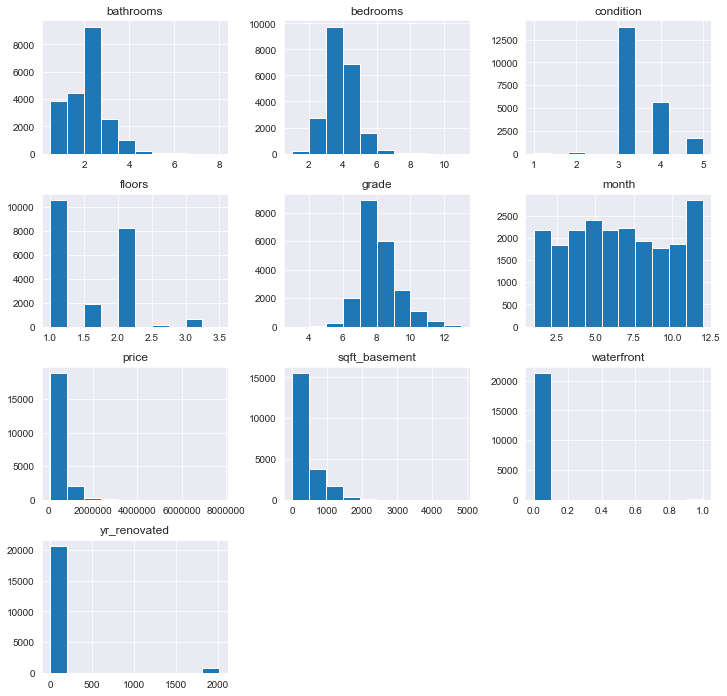

In [54]:
cat_df.hist(figsize = (12,12))
plt.show()

#### Bedrooms

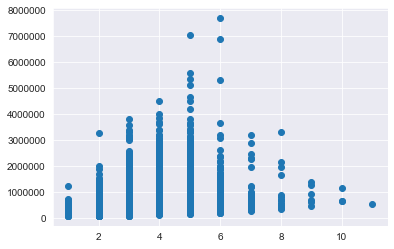

In [55]:
plt.scatter(x = cat_df['bedrooms'], y = cat_df['price'])
plt.show()

In [56]:
bins = [0, 1, 2, 3, 4, 5, 6, 11]
bins_br = pd.cut(cat_df['bedrooms'], bins)
bins_br = bins_br.cat.as_ordered()
bins_br.head()

0    (2, 3]
1    (2, 3]
2    (1, 2]
3    (3, 4]
4    (2, 3]
Name: bedrooms, dtype: category
Categories (7, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 11]]

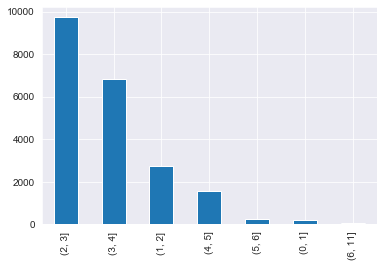

In [57]:
bins_br.value_counts().plot(kind='bar')

In [58]:
cat_df['bedrooms'] = bins_br

In [59]:
cat_df['bedrooms'].describe()

count      21420
unique         7
top       (2, 3]
freq        9732
Name: bedrooms, dtype: object

In [60]:
cat_df['bedrooms'] = cat_df['bedrooms'].cat.codes

In [61]:
br_dummies = pd.get_dummies(bins_br, prefix='br')

In [62]:
cat_df = pd.concat([cat_df, br_dummies], axis=1)

In [63]:
cat_df.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]","br_(5, 6]","br_(6, 11]"
0,221900.0,2,1.00,1.0,0.0,3,7,0.0,0.0,10,0,0,1,0,0,0,0
1,538000.0,2,2.25,2.0,0.0,3,7,400.0,1991.0,12,0,0,1,0,0,0,0
2,180000.0,1,1.00,1.0,0.0,3,6,0.0,0.0,2,0,1,0,0,0,0,0
3,604000.0,3,3.00,1.0,0.0,5,7,910.0,0.0,12,0,0,0,1,0,0,0
4,510000.0,2,2.00,1.0,0.0,3,8,0.0,0.0,2,0,0,1,0,0,0,0


In [64]:
cat_df = cat_df.drop(['bedrooms'], axis=1)

#### Bathrooms

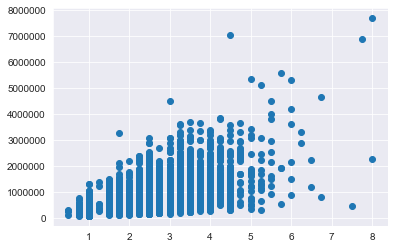

In [65]:
plt.scatter(x = cat_df['bathrooms'], y = cat_df['price'])
plt.show()

In [66]:
bins = [0, 1, 2, 3, 4, 5, 6, 9]
bins_ba = pd.cut(cat_df['bathrooms'], bins)
bins_ba = bins_ba.cat.as_ordered()
bins_ba.head()

0    (0, 1]
1    (2, 3]
2    (0, 1]
3    (2, 3]
4    (1, 2]
Name: bathrooms, dtype: category
Categories (7, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 9]]

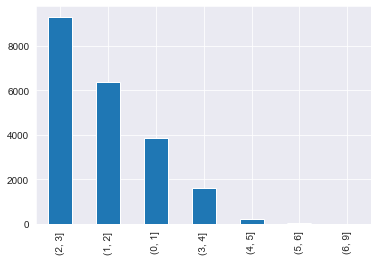

In [67]:
bins_ba.value_counts().plot(kind='bar')

In [68]:
cat_df['bathrooms'] = bins_ba
ba_dummies = pd.get_dummies(bins_ba, prefix='ba')
cat_df = pd.concat([cat_df, ba_dummies], axis=1)
cat_df.head()

,price,bathrooms,floors,waterfront,condition,grade,sqft_basement,yr_renovated,month,"br_(0, 1]",...,"br_(4, 5]","br_(5, 6]","br_(6, 11]","ba_(0, 1]","ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]"
0,221900.0,"(0, 1]",1.0,0.0,3,7,0.0,0.0,10,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,"(2, 3]",2.0,0.0,3,7,400.0,1991.0,12,0,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,"(0, 1]",1.0,0.0,3,6,0.0,0.0,2,0,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,"(2, 3]",1.0,0.0,5,7,910.0,0.0,12,0,...,0,0,0,0,0,1,0,0,0,0
4,510000.0,"(1, 2]",1.0,0.0,3,8,0.0,0.0,2,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
cat_df = cat_df.drop(['bathrooms'], axis=1)

#### Floors

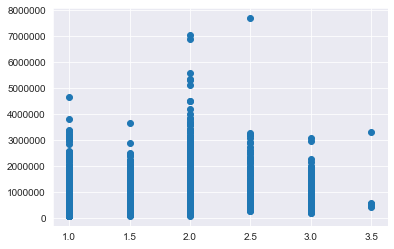

In [70]:
plt.scatter(x = cat_df['floors'], y = cat_df['price'])
plt.show()

In [71]:
bins = [0, 1, 2, 3.5]
bins_fl = pd.cut(cat_df['floors'], bins)
bins_fl = bins_fl.cat.as_ordered()
bins_fl.head()

0    (0.0, 1.0]
1    (1.0, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.0] < (1.0, 2.0] < (2.0, 3.5]]

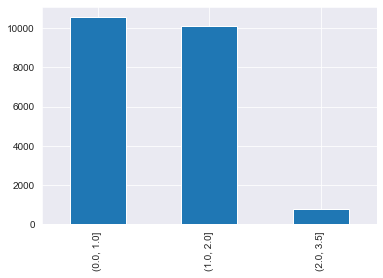

In [72]:
bins_fl.value_counts().plot(kind='bar')

In [73]:
cat_df['floors'] = bins_fl
fl_dummies = pd.get_dummies(bins_fl, prefix='fl')
cat_df = pd.concat([cat_df, fl_dummies], axis=1)
cat_df.head()

,price,floors,waterfront,condition,grade,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]",...,"ba_(0, 1]","ba_(1, 2]","ba_(2, 3]","ba_(3, 4]","ba_(4, 5]","ba_(5, 6]","ba_(6, 9]","fl_(0.0, 1.0]","fl_(1.0, 2.0]","fl_(2.0, 3.5]"
0,221900.0,"(0.0, 1.0]",0.0,3,7,0.0,0.0,10,0,0,...,1,0,0,0,0,0,0,1,0,0
1,538000.0,"(1.0, 2.0]",0.0,3,7,400.0,1991.0,12,0,0,...,0,0,1,0,0,0,0,0,1,0
2,180000.0,"(0.0, 1.0]",0.0,3,6,0.0,0.0,2,0,1,...,1,0,0,0,0,0,0,1,0,0
3,604000.0,"(0.0, 1.0]",0.0,5,7,910.0,0.0,12,0,0,...,0,0,1,0,0,0,0,1,0,0
4,510000.0,"(0.0, 1.0]",0.0,3,8,0.0,0.0,2,0,0,...,0,1,0,0,0,0,0,1,0,0


In [74]:
cat_df = cat_df.drop(['floors'], axis=1)

#### Waterfront

In [75]:
cat_df['waterfront'].value_counts(normalize=True)

0.0    0.993184
1.0    0.006816
Name: waterfront, dtype: float64

In [76]:
#As over 99% of houses do not have waterfront views, this may not be the best predictor
# of home value throughout the region. I'll drop this data from the df.

cat_df.drop(['waterfront'], axis=1, inplace=True)

#### Condition

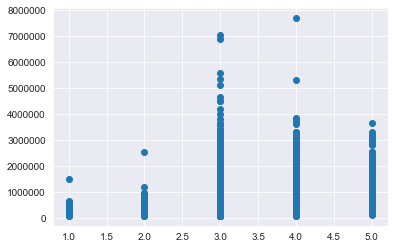

In [77]:
plt.scatter(x = cat_df['condition'], y = cat_df['price'])
plt.show()

In [78]:
bins = [1, 2, 3, 4, 5]
bins_con = pd.cut(cat_df['condition'], bins)
bins_con = bins_con.cat.as_ordered()
bins_con.head()

0    (2, 3]
1    (2, 3]
2    (2, 3]
3    (4, 5]
4    (2, 3]
Name: condition, dtype: category
Categories (4, interval[int64]): [(1, 2] < (2, 3] < (3, 4] < (4, 5]]

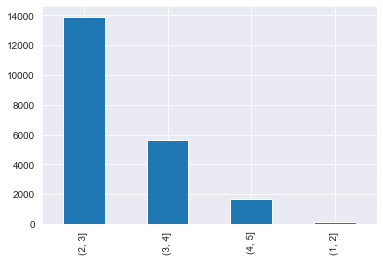

In [79]:
bins_con.value_counts().plot(kind='bar')

In [80]:
cat_df['condition'] = bins_con
con_dummies = pd.get_dummies(bins_con, prefix='cond')
cat_df = pd.concat([cat_df, con_dummies], axis=1)
cat_df.head()

,price,condition,grade,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]",...,"ba_(4, 5]","ba_(5, 6]","ba_(6, 9]","fl_(0.0, 1.0]","fl_(1.0, 2.0]","fl_(2.0, 3.5]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]"
0,221900.0,"(2, 3]",7,0.0,0.0,10,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,"(2, 3]",7,400.0,1991.0,12,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,180000.0,"(2, 3]",6,0.0,0.0,2,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,604000.0,"(4, 5]",7,910.0,0.0,12,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,510000.0,"(2, 3]",8,0.0,0.0,2,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [81]:
cat_df.drop(['condition'], axis=1, inplace=True)

#### Grade

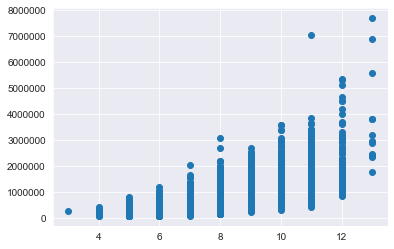

In [82]:
plt.scatter(x = cat_df['grade'], y = cat_df['price'])
plt.show()

In [83]:
bins = [2, 4, 7, 10, 13]
bins_grade = pd.cut(cat_df['grade'], bins)
bins_grade = bins_grade.cat.as_ordered()
bins_grade.head()

0     (4, 7]
1     (4, 7]
2     (4, 7]
3     (4, 7]
4    (7, 10]
Name: grade, dtype: category
Categories (4, interval[int64]): [(2, 4] < (4, 7] < (7, 10] < (10, 13]]

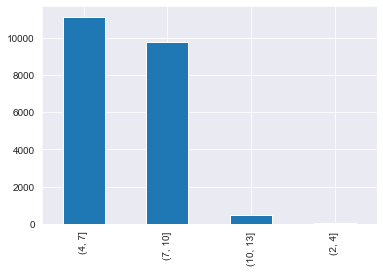

In [84]:
bins_grade.value_counts().plot(kind='bar')

In [85]:
cat_df['grade'] = bins_grade
grade_dummies = pd.get_dummies(bins_grade, prefix='gr')
cat_df = pd.concat([cat_df, grade_dummies], axis=1)
cat_df.head()

,price,grade,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]",...,"fl_(1.0, 2.0]","fl_(2.0, 3.5]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]"
0,221900.0,"(4, 7]",0.0,0.0,10,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,"(4, 7]",400.0,1991.0,12,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,180000.0,"(4, 7]",0.0,0.0,2,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,604000.0,"(4, 7]",910.0,0.0,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,510000.0,"(7, 10]",0.0,0.0,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [86]:
cat_df.drop(['grade'], axis=1, inplace=True)

#### Basement

In [87]:
#Change basement into categorical data where 1 equals the house has a basement
cat_df.loc[cat_df['sqft_basement'] > 0, 'sqft_basement'] = 1

In [88]:
cat_df.head()

,price,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]","br_(5, 6]",...,"fl_(1.0, 2.0]","fl_(2.0, 3.5]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]"
0,221900.0,0.0,0.0,10,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,1.0,1991.0,12,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,180000.0,0.0,0.0,2,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,604000.0,1.0,0.0,12,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,510000.0,0.0,0.0,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Year Renovated

In [89]:
#Change renovations into categorical data where 1 equals the house has been renovated
cat_df.loc[cat_df['yr_renovated'] > 0, 'yr_renovated'] = 1

In [90]:
cat_df.head()

,price,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]","br_(5, 6]",...,"fl_(1.0, 2.0]","fl_(2.0, 3.5]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]"
0,221900.0,0.0,0.0,10,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,1.0,1.0,12,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,180000.0,0.0,0.0,2,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,604000.0,1.0,0.0,12,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,510000.0,0.0,0.0,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Month

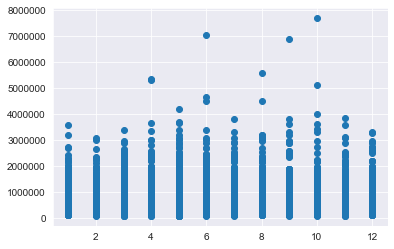

In [91]:
# Bin months into seasons
plt.scatter(x = cat_df['month'], y = cat_df['price'])
plt.show()

In [92]:
bins = [0, 3, 6, 9, 12]
bins_month = pd.cut(cat_df['month'], bins)
bins_month = bins_month.cat.as_ordered()
bins_month.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

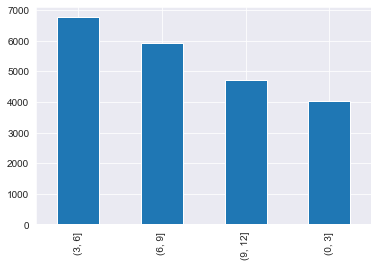

In [93]:
bins_month.value_counts().plot(kind='bar')

In [94]:
cat_df['month'] = bins_month
month_dummies = pd.get_dummies(bins_month, prefix='mo')
cat_df = pd.concat([cat_df, month_dummies], axis=1)
cat_df.head()

,price,sqft_basement,yr_renovated,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]","br_(5, 6]",...,"cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]","mo_(0, 3]","mo_(3, 6]","mo_(6, 9]","mo_(9, 12]"
0,221900.0,0.0,0.0,"(9, 12]",0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,538000.0,1.0,1.0,"(9, 12]",0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,180000.0,0.0,0.0,"(0, 3]",0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,604000.0,1.0,0.0,"(9, 12]",0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,510000.0,0.0,0.0,"(0, 3]",0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [95]:
cat_df.drop(['month'], axis=1, inplace=True)

In [96]:
cat_df.head()

,price,sqft_basement,yr_renovated,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]","br_(5, 6]","br_(6, 11]",...,"cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]","mo_(0, 3]","mo_(3, 6]","mo_(6, 9]","mo_(9, 12]"
0,221900.0,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,538000.0,1.0,1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,180000.0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,604000.0,1.0,0.0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,510000.0,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Check for Multicollinearity

In [97]:
cat_df.head()

,price,sqft_basement,yr_renovated,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 5]","br_(5, 6]","br_(6, 11]",...,"cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]","mo_(0, 3]","mo_(3, 6]","mo_(6, 9]","mo_(9, 12]"
0,221900.0,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,538000.0,1.0,1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,180000.0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,604000.0,1.0,0.0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,510000.0,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [98]:
cat_df.drop(['price'], axis=1, inplace=True)

In [99]:
continuous_df.head()

,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long
0,221900.0,1180,5650,1180,1955,98178,47.5112,-122.257
1,538000.0,2570,7242,2170,1951,98125,47.7210,-122.319
2,180000.0,770,10000,770,1933,98028,47.7379,-122.233
3,604000.0,1960,5000,1050,1965,98136,47.5208,-122.393
4,510000.0,1680,8080,1680,1987,98074,47.6168,-122.045


In [100]:
continuous_df.drop(['sqft_above'], axis=1, inplace=True)

In [101]:
continuous_df.head()

,price,sqft_living,sqft_lot,yr_built,zipcode,lat,long
0,221900.0,1180,5650,1955,98178,47.5112,-122.257
1,538000.0,2570,7242,1951,98125,47.7210,-122.319
2,180000.0,770,10000,1933,98028,47.7379,-122.233
3,604000.0,1960,5000,1965,98136,47.5208,-122.393
4,510000.0,1680,8080,1987,98074,47.6168,-122.045


In [102]:
cont_cat_df = pd.concat([continuous_df, cat_df], axis=1)

In [103]:
cont_cat_df.head()

,price,sqft_living,sqft_lot,yr_built,zipcode,lat,long,sqft_basement,yr_renovated,"br_(0, 1]",...,"cond_(3, 4]","cond_(4, 5]","gr_(2, 4]","gr_(4, 7]","gr_(7, 10]","gr_(10, 13]","mo_(0, 3]","mo_(3, 6]","mo_(6, 9]","mo_(9, 12]"
0,221900.0,1180,5650,1955,98178,47.5112,-122.257,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
1,538000.0,2570,7242,1951,98125,47.7210,-122.319,1.0,1.0,0,...,0,0,0,1,0,0,0,0,0,1
2,180000.0,770,10000,1933,98028,47.7379,-122.233,0.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0
3,604000.0,1960,5000,1965,98136,47.5208,-122.393,1.0,0.0,0,...,0,1,0,1,0,0,0,0,0,1
4,510000.0,1680,8080,1987,98074,47.6168,-122.045,0.0,0.0,0,...,0,0,0,0,1,0,1,0,0,0


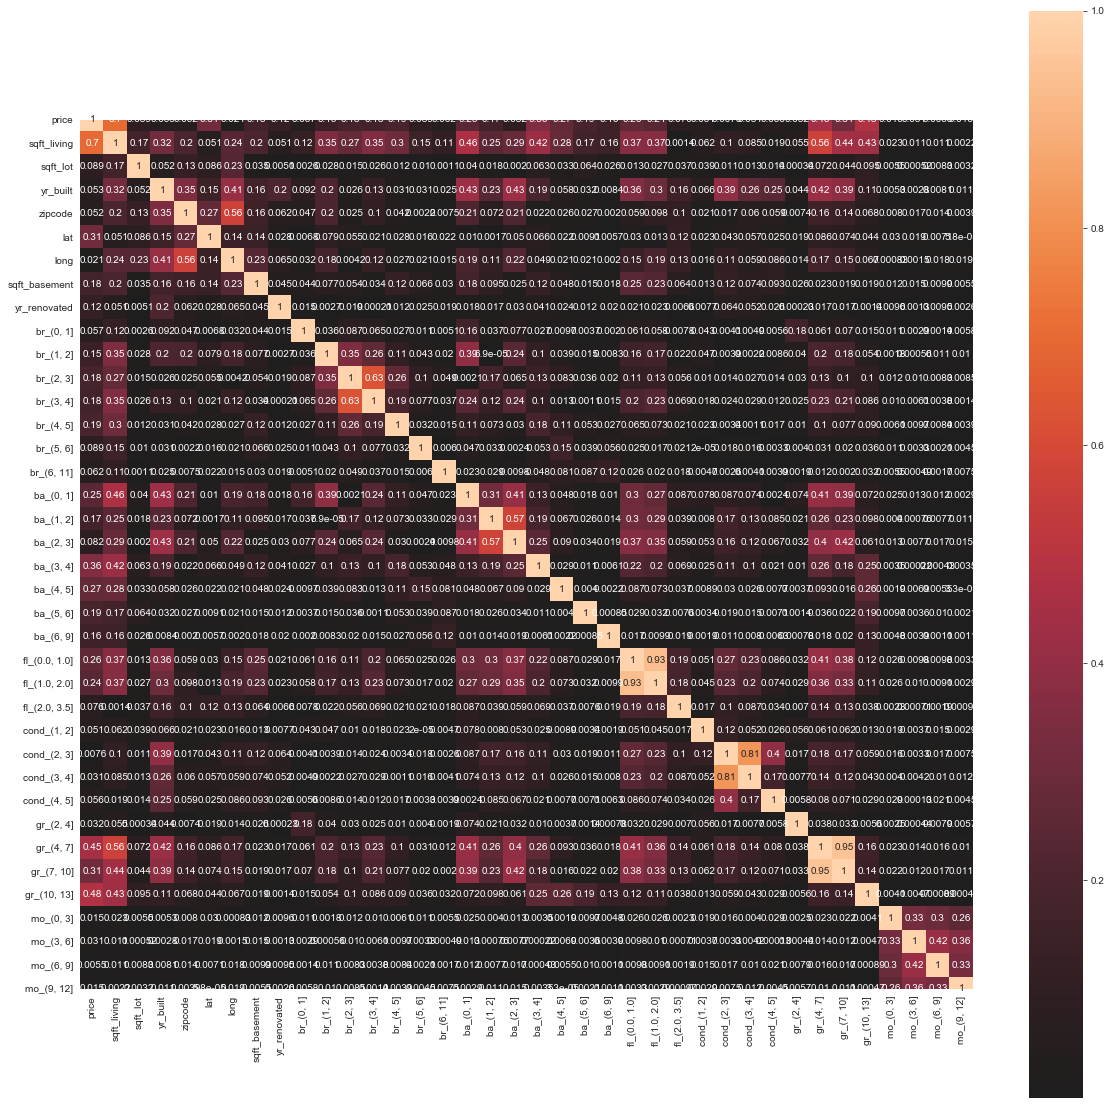

In [104]:
plt.figure(figsize=(20, 20))
sns.heatmap(abs(cont_cat_df.corr()), center = 0, xticklabels=cont_cat_df.columns.values, 
           yticklabels=cont_cat_df.columns.values, annot=True, square=True)
plt.show()

In [105]:
# Visualization of a second heatmap to double check for multicollinearity. Though,
# adding in the correlation values to each cell may look a little messy, we're really
# only interested in values above 0.75, which would stand out with color coordination.
# It seems that there aren't any major correlation issues at this point.

## Model

### Baseline Model

In [106]:
predictors = cont_cat_df.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(cont_cat_df.price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1325.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:35:04   Log-Likelihood:            -2.9320e+05
No. Observations:               21420   AIC:                         5.865e+05
Df Residuals:                   21387   BIC:                         5.867e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.275e+06   1.47e+06      1.552      0.121   -5.99e+05    5.15e+06
sqft_living     230.9563      3.090     74.750      0.000     224.900     237.012
sqft_lot         -0.0688      0.037     -1.863      0.062      -0.141       0.004
yr_built      -1939.1024     77.375    -25.061      0.000   -2090.764   -1787.441
zipcode        -596.8360     35.161    -16.974      0.000    -665.755    -527.917
lat            6.148e+05   1.13e+04     54.232      0.000    5.93e+05    6.37e+05
long          -2.342e+05   1.39e+04    -16.883      0.000   -2.61e+05   -2.07e+05
sqft_basement -5957.5630   3614.223     -1.648      0.099    -1.3e+04    1126.585
yr_renovated   9.545e+04   8427.452     11.326      0.000    7.89e+04    1.12e+05
br_(0, 1]      4.399e+05    2.1e+05      2.093      0.036     2.8e+04    8.52e+05
br_(1, 2]      4.344e+05    2.1e+05      2.069      0.039    2.29e+04    8.46e+05
br_(2, 3]      3.942e+05   2.09e+05      1.882      0.060   -1.64e+04    8.05e+05
br_(3, 4]      3.449e+05   2.09e+05      1.647      0.100   -6.56e+04    7.55e+05
br_(4, 5]       3.19e+05   2.09e+05      1.523      0.128   -9.15e+04    7.29e+05
br_(5, 6]      2.398e+05    2.1e+05      1.144      0.253   -1.71e+05    6.51e+05
br_(6, 11]     1.026e+05   2.11e+05      0.487      0.626    -3.1e+05    5.16e+05
ba_(0, 1]      5.104e+04    2.1e+05      0.243      0.808    -3.6e+05    4.62e+05
ba_(1, 2]      4.499e+04   2.09e+05      0.215      0.830   -3.66e+05    4.55e+05
ba_(2, 3]       4.92e+04   2.09e+05      0.235      0.814   -3.61e+05    4.59e+05
ba_(3, 4]      1.542e+05    2.1e+05      0.735      0.462   -2.57e+05    5.65e+05
ba_(4, 5]      3.095e+05    2.1e+05      1.474      0.140   -1.02e+05    7.21e+05
ba_(5, 6]      7.041e+05   2.12e+05      3.318      0.001    2.88e+05    1.12e+06
ba_(6, 9]      9.617e+05   2.19e+05      4.385      0.000    5.32e+05    1.39e+06
fl_(0.0, 1.0]  7.232e+05   4.88e+05      1.482      0.138   -2.33e+05    1.68e+06
fl_(1.0, 2.0]  7.438e+05   4.88e+05      1.523      0.128   -2.14e+05     1.7e+06
fl_(2.0, 3.5]  8.078e+05    4.9e+05      1.650      0.099   -1.52e+05    1.77e+06
cond_(1, 2]    3.759e+04   4.37e+04      0.861      0.389    -4.8e+04    1.23e+05
cond_(2, 3]    5.713e+04   4.05e+04      1.410      0.158   -2.23e+04    1.37e+05
cond_(3, 4]    8.965e+04   4.05e+04      2.213      0.027    1.03e+04    1.69e+05
cond_(4, 5]    1.329e+05   4.07e+04      3.262      0.001     5.3e+04    2.13e+05
gr_(2, 4]      4.164e+05   3.67e+05      1.135      0.256   -3.03e+05    1.14e+06
gr_(4, 7]       4.13e+05   3.67e+05      1.125      0.260   -3.06e+05    1.13e+06
gr_(7, 10]     5.157e+05   3.67e+05      1.405      0.160   -2.04e+05    1.24e+06
gr_(10, 13]    9.297e+05   3.67e+05      2.532      0.011     2.1e+05    1.65e+06
mo_(0, 3]       5.79e+05   3.67e+05      1.580   